# I. Import Lib and Data

## 1.1 Import Utils

In [1]:
# Import utils
import sys 
sys.path.append('../utils')
import importlib

import eda_utils as utils
importlib.reload(utils)

<module 'eda_utils' from 'e:\\SkyRevenue Insights\\1. Data Preprocessing\\../utils\\eda_utils.py'>

## 1.2 Import Lib

In [2]:
# Import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import Image, display

## 1.3 Import Data

In [3]:
import pandas as pd

# Đường dẫn đến file Excel
file_path = r"E:\SkyRevenue Insights\0. Data\df.xlsx"

# Kiểm tra file có tồn tại không
import os
if os.path.exists(file_path):
    print("File tồn tại!")
else:
    print("File không tồn tại, kiểm tra lại đường dẫn!")
    raise FileNotFoundError("File không tồn tại!")

# Đọc sheet "Data"
df_org = pd.read_excel(file_path, sheet_name="Data")
df = df_org.copy()
# Hiển thị vài dòng đầu của DataFrame để kiểm tra
df.head()

File tồn tại!


,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,departure_date,departure_time,arrival_date,arrival_time,from_to_location,from_to,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount
0,20205,31268,Xs1fLinPQun+Oy/mD0FlfXMyJD38YlXJfXNbz+qO+5U=,Female,40.0,IOS,Paid,2023-03-01,2023-03-14,17:55:00,2023-03-14,18:55:00,BMV - SGN,Đắk Lắk - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,I1_ECO,867760,0,0.0,45000
1,20190,31242,m/auVlEoaGSe2MqR/Lq4CFXJnI8zauNyF/KiFmMgXHs=,Female,40.0,GYL,Paid,2023-03-01,2023-03-02,09:30:00,2023-03-02,10:30:00,BMV - SGN,Đắk Lắk - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,Z1_ECO,974280,0,0.0,45000
2,20245,31337,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,48.0,IOS,Paid,2023-03-01,2023-04-10,13:10:00,2023-04-10,14:35:00,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1423080,0,0.0,16000
3,20259,31360,WiK2P31WEd4mckRNVWz0C2aKKRgSrauAG8NdfTLnKjE=,Male,29.0,Android,New,2023-03-01,2023-04-10,13:10:00,2023-04-10,14:35:00,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1067310,0,0.0,45000
4,20255,31355,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,42.0,IOS,Paid,2023-03-01,2023-04-10,13:10:00,2023-04-10,14:35:00,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1067310,0,0.0,24000


# II. Data Preprocessing

## 2.1 Quick Check

In [4]:
csv_path = r"E:\SkyRevenue Insights\0. Data\df.xlsx"

quick_check = utils.quick_overview_data(df, csv_path, open_browser=True)
quick_check

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 58.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

{'file_name': 'df',
 'shape': (19096, 20),
 'columns': ['order_id',
  'ticket_id',
  'passenger_id',
  'passenger_gender',
  'passenger_age',
  'ticket_source_name',
  'ticket_status',
  'created_date',
  'departure_date',
  'departure_time',
  'arrival_date',
  'arrival_time',
  'from_to_location',
  'from_to',
  'airline',
  'seat_class',
  'ticket_price',
  'baggage',
  'insurance_fee',
  'discount_amount'],
 'dtypes': {'order_id': dtype('int64'),
  'ticket_id': dtype('int64'),
  'passenger_id': dtype('O'),
  'passenger_gender': dtype('O'),
  'passenger_age': dtype('float64'),
  'ticket_source_name': dtype('O'),
  'ticket_status': dtype('O'),
  'created_date': dtype('<M8[ns]'),
  'departure_date': dtype('<M8[ns]'),
  'departure_time': dtype('O'),
  'arrival_date': dtype('<M8[ns]'),
  'arrival_time': dtype('O'),
  'from_to_location': dtype('O'),
  'from_to': dtype('O'),
  'airline': dtype('O'),
  'seat_class': dtype('O'),
  'ticket_price': dtype('int64'),
  'baggage': dtype('int64'),

## 2.2 Duplicated Check

In [5]:
columns_to_check = df.columns.tolist()

df_cus_ls = utils.check_duplicates(df, columns_to_check)

🔍 Duplicate Rows based on data: 0 duplicates found.
No duplicates found. Data is clean.


## 2.3 Null Check

In [6]:
columns_to_check = df.columns.tolist()

check_null_overlap = utils.check_null_overlap(df, columns_to_check)
check_null_overlap

🔍 Null Count per Column:
 - order_id: 0 nulls
 - ticket_id: 0 nulls
 - passenger_id: 0 nulls
 - passenger_gender: 13 nulls
 - passenger_age: 5 nulls
 - ticket_source_name: 0 nulls
 - ticket_status: 0 nulls
 - created_date: 0 nulls
 - departure_date: 0 nulls
 - departure_time: 0 nulls
 - arrival_date: 0 nulls
 - arrival_time: 0 nulls
 - from_to_location: 0 nulls
 - from_to: 0 nulls
 - airline: 0 nulls
 - seat_class: 120 nulls
 - ticket_price: 0 nulls
 - baggage: 0 nulls
 - insurance_fee: 0 nulls
 - discount_amount: 0 nulls

📊 Checking if nulls occur in the same rows:
[X] Nulls do NOT overlap exactly in all columns.

 Rows with partial nulls (mismatch):


,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,departure_date,departure_time,arrival_date,arrival_time,from_to_location,from_to,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount
838,20740,32117,TZVvTNMPPWz1Jy/yNW0TR6tS4oYf/XPSO5XfKmIDHCg=,Female,23.0,IOS,New,2023-03-06,2023-03-16,13:25:00,2023-03-16,14:35:00,SGN - UIH,Hồ Chí Minh - Bình Định,73SByZiBulQv8bk/PGRtuNIpW3R+36DZ9nM31hDpDMQ=,NaN,630720,199650,0.0,45000
3484,22575,35105,UOwHd9qo/sn9GWfARIFQIvRnGXN3yoZrzvH73IRLTp8=,Male,30.0,IOS,Paid,2023-03-21,2023-04-29,11:40:00,2023-04-29,12:50:00,CXR - SGN,Khánh Hòa - Hồ Chí Minh,73SByZiBulQv8bk/PGRtuNIpW3R+36DZ9nM31hDpDMQ=,NaN,656800,0,0.0,40000
3485,22575,35106,UOwHd9qo/sn9GWfARIFQIvRnGXN3yoZrzvH73IRLTp8=,Male,29.0,IOS,Paid,2023-03-21,2023-04-29,11:40:00,2023-04-29,12:50:00,CXR - SGN,Khánh Hòa - Hồ Chí Minh,73SByZiBulQv8bk/PGRtuNIpW3R+36DZ9nM31hDpDMQ=,NaN,788160,0,0.0,45000
3486,22573,35101,UOwHd9qo/sn9GWfARIFQIvRnGXN3yoZrzvH73IRLTp8=,Male,30.0,IOS,New,2023-03-21,2023-04-29,11:40:00,2023-04-29,12:50:00,CXR - SGN,Khánh Hòa - Hồ Chí Minh,73SByZiBulQv8bk/PGRtuNIpW3R+36DZ9nM31hDpDMQ=,NaN,788160,0,0.0,40000
3487,22573,35102,UOwHd9qo/sn9GWfARIFQIvRnGXN3yoZrzvH73IRLTp8=,Male,29.0,IOS,New,2023-03-21,2023-04-29,11:40:00,2023-04-29,12:50:00,CXR - SGN,Khánh Hòa - Hồ Chí Minh,73SByZiBulQv8bk/PGRtuNIpW3R+36DZ9nM31hDpDMQ=,NaN,525440,0,0.0,55000


In [7]:
# Hàm tính tỷ lệ phần trăm
def calculate_percentage(part, whole):
    return (part / whole) * 100 if whole > 0 else 0

In [8]:
# --- 1: Xử lý cột passenger_gender ---
print("\n=== Xử lý cột passenger_gender ===")

# Đếm tổng số null ban đầu trong cột passenger_gender
total_gender_nulls = df['passenger_gender'].isnull().sum()
total_rows = len(df)

# In số lượng null ban đầu
print(f"Tổng số giá trị null trong passenger_gender: {total_gender_nulls}")
print(f"Tổng số hàng trong dữ liệu: {total_rows}")

# Bước 1: Điền giá trị null dựa trên passenger_id
# Tạo dictionary ánh xạ passenger_id với passenger_gender
gender_mapping = df.dropna(subset=['passenger_gender']).set_index('passenger_id')['passenger_gender'].to_dict()

# Điền giá trị null dựa trên passenger_id
df['passenger_gender'] = df.apply(
    lambda row: gender_mapping.get(row['passenger_id'], row['passenger_gender']) if pd.isnull(row['passenger_gender']) else row['passenger_gender'],
    axis=1
)

# Đếm số lượng null đã điền bằng passenger_id
nulls_filled_by_id_gender = total_gender_nulls - df['passenger_gender'].isnull().sum()

# Đếm số lượng null còn lại sau khi điền
remaining_gender_nulls = df['passenger_gender'].isnull().sum()

# Bước 2: Loại bỏ các hàng có giá trị null còn lại trong passenger_gender
rows_before_drop = len(df)
df = df.dropna(subset=['passenger_gender'])
rows_after_drop = len(df)

# Số lượng null đã loại bỏ
nulls_dropped_gender = rows_before_drop - rows_after_drop

# In kết quả
print(f"Số lượng null đã điền bằng passenger_id: {nulls_filled_by_id_gender}")
print(f"Số lượng null đã loại bỏ: {nulls_dropped_gender}/{total_gender_nulls}")
print(f"Tỷ lệ null đã loại bỏ trên toàn bộ dữ liệu: {calculate_percentage(nulls_dropped_gender, total_rows):.2f}%")


=== Xử lý cột passenger_gender ===
Tổng số giá trị null trong passenger_gender: 13
Tổng số hàng trong dữ liệu: 19096
Số lượng null đã điền bằng passenger_id: 11
Số lượng null đã loại bỏ: 2/13
Tỷ lệ null đã loại bỏ trên toàn bộ dữ liệu: 0.01%


In [9]:
# --- 2: Xử lý cột passenger_age ---
print("\n=== Xử lý cột passenger_age ===")

# Đếm tổng số null ban đầu trong cột passenger_age
total_age_nulls = df['passenger_age'].isnull().sum()
total_rows_after_gender = len(df)

# In số lượng null ban đầu
print(f"Tổng số giá trị null trong passenger_age: {total_age_nulls}")
print(f"Tổng số hàng trong dữ liệu (sau khi xử lý passenger_gender): {total_rows_after_gender}")

# Bước 1: Điền giá trị null dựa trên passenger_id
# Tạo dictionary ánh xạ passenger_id với passenger_age
age_mapping = df.dropna(subset=['passenger_age']).set_index('passenger_id')['passenger_age'].to_dict()

# Điền giá trị null dựa trên passenger_id
df['passenger_age'] = df.apply(
    lambda row: age_mapping.get(row['passenger_id'], row['passenger_age']) if pd.isnull(row['passenger_age']) else row['passenger_age'],
    axis=1
)

# Đếm số lượng null đã điền bằng passenger_id
nulls_filled_by_id_age = total_age_nulls - df['passenger_age'].isnull().sum()

# Bước 2: Loại bỏ các giá trị null còn lại
rows_before_drop_age = len(df)
df = df.dropna(subset=['passenger_age'])
rows_after_drop_age = len(df)

# Số lượng null đã loại bỏ
nulls_dropped_age = rows_before_drop_age - rows_after_drop_age

# In kết quả
print(f"Số lượng null đã điền bằng passenger_id: {nulls_filled_by_id_age}/{total_age_nulls}")
print(f"Tỷ lệ null đã điền trên toàn bộ dữ liệu: {calculate_percentage(nulls_filled_by_id_age, total_rows):.2f}%")
print(f"Số lượng null đã loại bỏ: {nulls_dropped_age}/{total_age_nulls}")
print(f"Tỷ lệ null đã loại bỏ trên toàn bộ dữ liệu: {calculate_percentage(nulls_dropped_age, total_rows):.2f}%")


=== Xử lý cột passenger_age ===
Tổng số giá trị null trong passenger_age: 5
Tổng số hàng trong dữ liệu (sau khi xử lý passenger_gender): 19094
Số lượng null đã điền bằng passenger_id: 5/5
Tỷ lệ null đã điền trên toàn bộ dữ liệu: 0.03%
Số lượng null đã loại bỏ: 0/5
Tỷ lệ null đã loại bỏ trên toàn bộ dữ liệu: 0.00%


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17348\1955720470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passenger_age'] = df.apply(


In [10]:
# --- 3: Xử lý giá trị bất thường trong passenger_age (-1, 0, 115, 999999) ---
print("\n=== Xử lý giá trị bất thường trong passenger_age (-1, 0, 115, 999999) ===")

# Đếm số lượng các giá trị bất thường
abnormal_values = [-1, 0, 115, 999999]
abnormal_count = df['passenger_age'].isin(abnormal_values).sum()

# Tính tỷ lệ phần trăm các giá trị bất thường trên toàn bộ dữ liệu
abnormal_percentage = calculate_percentage(abnormal_count, total_rows)

# In kết quả
print(f"Số lượng giá trị bất thường (-1, 0, 115, 999999): {abnormal_count}")
print(f"Tỷ lệ giá trị bất thường trên toàn bộ dữ liệu: {abnormal_percentage:.2f}%")

# Bước 1: Điền giá trị bất thường dựa trên passenger_id
# Tạo dictionary ánh xạ passenger_id với passenger_age (chỉ lấy các giá trị không bất thường)
valid_age_mapping = df[~df['passenger_age'].isin(abnormal_values)].set_index('passenger_id')['passenger_age'].to_dict()

# Điền giá trị bất thường dựa trên passenger_id
df['passenger_age'] = df.apply(
    lambda row: valid_age_mapping.get(row['passenger_id'], row['passenger_age']) if row['passenger_age'] in abnormal_values else row['passenger_age'],
    axis=1
)

# Đếm số lượng giá trị bất thường đã điền
abnormal_filled = abnormal_count - df['passenger_age'].isin(abnormal_values).sum()

# Bước 2: Loại bỏ các giá trị bất thường còn lại
rows_before_drop_abnormal = len(df)
df = df[~df['passenger_age'].isin(abnormal_values)]
rows_after_drop_abnormal = len(df)

# Số lượng giá trị bất thường đã loại bỏ
abnormal_dropped = rows_before_drop_abnormal - rows_after_drop_abnormal

# In kết quả
print(f"Số lượng giá trị bất thường đã điền bằng passenger_id: {abnormal_filled}/{abnormal_count}")
print(f"Tỷ lệ giá trị bất thường đã điền trên toàn bộ dữ liệu: {calculate_percentage(abnormal_filled, total_rows):.2f}%")
print(f"Số lượng giá trị bất thường đã loại bỏ: {abnormal_dropped}/{abnormal_count}")
print(f"Tỷ lệ giá trị bất thường đã loại bỏ trên toàn bộ dữ liệu: {calculate_percentage(abnormal_dropped, total_rows):.2f}%")


=== Xử lý giá trị bất thường trong passenger_age (-1, 0, 115, 999999) ===
Số lượng giá trị bất thường (-1, 0, 115, 999999): 29
Tỷ lệ giá trị bất thường trên toàn bộ dữ liệu: 0.15%
Số lượng giá trị bất thường đã điền bằng passenger_id: 29/29
Tỷ lệ giá trị bất thường đã điền trên toàn bộ dữ liệu: 0.15%
Số lượng giá trị bất thường đã loại bỏ: 0/29
Tỷ lệ giá trị bất thường đã loại bỏ trên toàn bộ dữ liệu: 0.00%


In [11]:
# --- 4: Kiểm tra và xử lý giá trị null trong cột seat_class ---
print("\n=== Kiểm tra và xử lý giá trị null trong cột seat_class ===")

# Đếm tổng số giá trị null trong cột seat_class
total_seat_class_nulls = df['seat_class'].isnull().sum()
total_rows = len(df)

# Tính tỷ lệ phần trăm giá trị null
seat_class_null_percentage = calculate_percentage(total_seat_class_nulls, total_rows)

# In kết quả
print(f"Tổng số giá trị null trong seat_class: {total_seat_class_nulls}")
print(f"Tổng số hàng trong dữ liệu: {total_rows}")
print(f"Tỷ lệ giá trị null trong seat_class trên toàn bộ dữ liệu: {seat_class_null_percentage:.2f}%")

# Phân tích chuyên sâu và xử lý
# Bước 1: Loại bỏ các hàng có seat_class null
rows_before_drop = len(df)
df = df.dropna(subset=['seat_class'])
rows_dropped = rows_before_drop - len(df)

# In kết quả sau khi xử lý
print(f"Số lượng hàng đã loại bỏ do seat_class null: {rows_dropped}")
print(f"Số lượng giá trị null còn lại trong seat_class sau khi xử lý: {df['seat_class'].isnull().sum()}")


=== Kiểm tra và xử lý giá trị null trong cột seat_class ===
Tổng số giá trị null trong seat_class: 120
Tổng số hàng trong dữ liệu: 19094
Tỷ lệ giá trị null trong seat_class trên toàn bộ dữ liệu: 0.63%
Số lượng hàng đã loại bỏ do seat_class null: 120
Số lượng giá trị null còn lại trong seat_class sau khi xử lý: 0


In [12]:
# --- Yêu cầu 2: Phân tích và xử lý giá trị âm trong baggage, insurance_fee, discount_amount ---
print("\n=== Phân tích và xử lý giá trị âm trong baggage, insurance_fee, discount_amount ===")

# Hàm kiểm tra và xử lý giá trị âm
def analyze_and_fix_negative_values(column_name):
    # Đếm số lượng giá trị âm
    negative_count = (df[column_name] < 0).sum()
    negative_percentage = calculate_percentage(negative_count, total_rows)
    
    # In kết quả
    print(f"\nPhân tích cột {column_name}:")
    print(f"Số lượng giá trị âm: {negative_count}")
    print(f"Tỷ lệ giá trị âm trên toàn bộ dữ liệu: {negative_percentage:.2f}%")
    
    # Thay thế giá trị âm bằng 0
    df[column_name] = df[column_name].apply(lambda x: 0 if x < 0 else x)
    
    # Kiểm tra lại sau khi xử lý
    negative_count_after = (df[column_name] < 0).sum()
    print(f"Số lượng giá trị âm sau khi xử lý: {negative_count_after}")

# Phân tích và xử lý từng cột
analyze_and_fix_negative_values('baggage')
analyze_and_fix_negative_values('insurance_fee')
analyze_and_fix_negative_values('discount_amount')

# In vài dòng đầu của DataFrame để kiểm tra
print("\nDữ liệu sau khi xử lý:")
print(df[['seat_class', 'baggage', 'insurance_fee', 'discount_amount']].head())


=== Phân tích và xử lý giá trị âm trong baggage, insurance_fee, discount_amount ===

Phân tích cột baggage:
Số lượng giá trị âm: 2
Tỷ lệ giá trị âm trên toàn bộ dữ liệu: 0.01%
Số lượng giá trị âm sau khi xử lý: 0

Phân tích cột insurance_fee:
Số lượng giá trị âm: 3
Tỷ lệ giá trị âm trên toàn bộ dữ liệu: 0.02%
Số lượng giá trị âm sau khi xử lý: 0

Phân tích cột discount_amount:
Số lượng giá trị âm: 2
Tỷ lệ giá trị âm trên toàn bộ dữ liệu: 0.01%
Số lượng giá trị âm sau khi xử lý: 0

Dữ liệu sau khi xử lý:
  seat_class  baggage  insurance_fee  discount_amount
0     I1_ECO        0            0.0            45000
1     Z1_ECO        0            0.0            45000
2     J1_ECO        0            0.0            16000
3     J1_ECO        0            0.0            45000
4     J1_ECO        0            0.0            24000


## 2.4 Type conversion

In [13]:
print("\n=== Kiểm tra và chuyển đổi kiểu dữ liệu ===")

# In kiểu dữ liệu hiện tại
print("\nKiểu dữ liệu hiện tại của từng cột:")
print(df.dtypes)


=== Kiểm tra và chuyển đổi kiểu dữ liệu ===

Kiểu dữ liệu hiện tại của từng cột:
order_id                       int64
ticket_id                      int64
passenger_id                  object
passenger_gender              object
passenger_age                float64
ticket_source_name            object
ticket_status                 object
created_date          datetime64[ns]
departure_date        datetime64[ns]
departure_time                object
arrival_date          datetime64[ns]
arrival_time                  object
from_to_location              object
from_to                       object
airline                       object
seat_class                    object
ticket_price                   int64
baggage                        int64
insurance_fee                float64
discount_amount                int64
dtype: object


In [14]:
df['passenger_age'] = df['passenger_age'].astype('int64')
df['insurance_fee'] = df['insurance_fee'].astype('int64')

# III. Feature Enginnering

## 3.1 Seat Class Group

In [15]:
# --- Phân tích và gom nhóm cột seat_class ---
print("\n=== Phân tích cột seat_class ===")

# Kiểm tra các giá trị duy nhất và tần suất
print("\nCác giá trị duy nhất trong seat_class (trước khi gom nhóm):")
print(df['seat_class'].unique())
print(f"\nSố lượng giá trị duy nhất: {df['seat_class'].nunique()}")

print("\nTần suất của từng giá trị (trước khi gom nhóm):")
print(df['seat_class'].value_counts())


=== Phân tích cột seat_class ===

Các giá trị duy nhất trong seat_class (trước khi gom nhóm):
['I1_ECO' 'Z1_ECO' 'J1_ECO' 'EconomySmart' 'EconomySaver' 'N' 'L' 'E1_ECO'
 'A1_ECO' 'P' 'U1_ECO' 'E' 'W1_ECO' 'R1_ECO' 'T' 'R' 'B1_ECO' 'C' 'A' 'K'
 'D' 'H' 'H1_ECO' 'Q' 'L1_ECO' 'K1_ECO' 'M1_ECO' 'M' 'T1_ECO' 'N1_ECO'
 'EconomyFlex' 'C,W' 'E,R' 'Q1_ECO' 'R,E' 'W,C' 'D,Z' 'O1_ECO' 'S'
 'EconomySaverMax' 'A1_DLX' 'O' 'U1_DLX' 'R,T' 'K1_DLX' 'E1_DLX' 'Z1_DLX'
 'BusinessSmart' 'U' 'G' 'Y' 'I1_DLX' 'L1_DLX' 'J1_DLX' 'V' 'W' 'L,K'
 'S1_ECO' 'V_SBoss' 'K,N' 'Q,T' 'D,I' 'T,Q' 'W1_DLX' 'BusinessFlex' 'I'
 'K,R' 'R,K' 'S,L']

Số lượng giá trị duy nhất: 69

Tần suất của từng giá trị (trước khi gom nhóm):
seat_class
E1_ECO          3162
A1_ECO          2652
Z1_ECO          2608
EconomySaver    1622
W1_ECO          1269
                ... 
L,K                1
BusinessFlex       1
W1_DLX             1
D,I                1
S,L                1
Name: count, Length: 69, dtype: int64


In [16]:
# Extract unique seat_class values
seat_classes = df['seat_class'].unique()

# Initialize lists to store grouped classes
first_class = []
business_class = []
deluxe_class = []
economy_class = []

# Grouping logic
for seat in seat_classes:
    seat_lower = seat.lower()
    if seat == 'V_SBoss':  # Explicitly First Class
        first_class.append(seat)
    elif 'business' in seat_lower:  # Business class
        business_class.append(seat)
    elif 'dlx' in seat_lower:  # Deluxe class
        deluxe_class.append(seat)
    else:  # Economy class (ECO, Economy, single letters, or combinations)
        economy_class.append(seat)

# Create a mapping from seat_class to category
seat_to_category = {}
for seat in first_class:
    seat_to_category[seat] = 'First Class'
for seat in business_class:
    seat_to_category[seat] = 'Business'
for seat in deluxe_class:
    seat_to_category[seat] = 'Deluxe'
for seat in economy_class:
    seat_to_category[seat] = 'Economy'

# Map seat_class to category in the DataFrame
# Handle any unmapped values by assigning to 'Unknown'
df['seat_category'] = df['seat_class'].map(seat_to_category).fillna('Unknown')

# Count passengers per category
passenger_counts = df['seat_category'].value_counts()

# Print results
print("Number of passengers per class:")
for category in ['First Class', 'Business', 'Deluxe', 'Economy', 'Unknown']:
    count = passenger_counts.get(category, 0)
    print(f"{category}: {count}")

# Verify total passengers
total_passengers = passenger_counts.sum()
print(f"\nTotal passengers: {total_passengers}")
print(f"Total rows in dataset: {len(df)}")

# Print the grouped seat classes for reference
print("\nGrouped seat classes:")
print("First Class:", first_class)
print("Business Class:", business_class)
print("Deluxe Class:", deluxe_class)
print("Economy Class:", economy_class)
print("Number of unique seat classes:", len(seat_classes))

Number of passengers per class:
First Class: 4
Business: 16
Deluxe: 41
Economy: 18913
Unknown: 0

Total passengers: 18974
Total rows in dataset: 18974

Grouped seat classes:
First Class: ['V_SBoss']
Business Class: ['BusinessSmart', 'BusinessFlex']
Deluxe Class: ['A1_DLX', 'U1_DLX', 'K1_DLX', 'E1_DLX', 'Z1_DLX', 'I1_DLX', 'L1_DLX', 'J1_DLX', 'W1_DLX']
Economy Class: ['I1_ECO', 'Z1_ECO', 'J1_ECO', 'EconomySmart', 'EconomySaver', 'N', 'L', 'E1_ECO', 'A1_ECO', 'P', 'U1_ECO', 'E', 'W1_ECO', 'R1_ECO', 'T', 'R', 'B1_ECO', 'C', 'A', 'K', 'D', 'H', 'H1_ECO', 'Q', 'L1_ECO', 'K1_ECO', 'M1_ECO', 'M', 'T1_ECO', 'N1_ECO', 'EconomyFlex', 'C,W', 'E,R', 'Q1_ECO', 'R,E', 'W,C', 'D,Z', 'O1_ECO', 'S', 'EconomySaverMax', 'O', 'R,T', 'U', 'G', 'Y', 'V', 'W', 'L,K', 'S1_ECO', 'K,N', 'Q,T', 'D,I', 'T,Q', 'I', 'K,R', 'R,K', 'S,L']
Number of unique seat classes: 69


## 3.2 Age Group

Summary statistics for age:
count    18974.000000
mean        30.300042
std         13.970070
min          1.000000
25%         22.000000
50%         28.000000
75%         36.000000
max         91.000000
Name: passenger_age, dtype: float64

Missing ages: 0
Invalid ages (negative or >120): 0


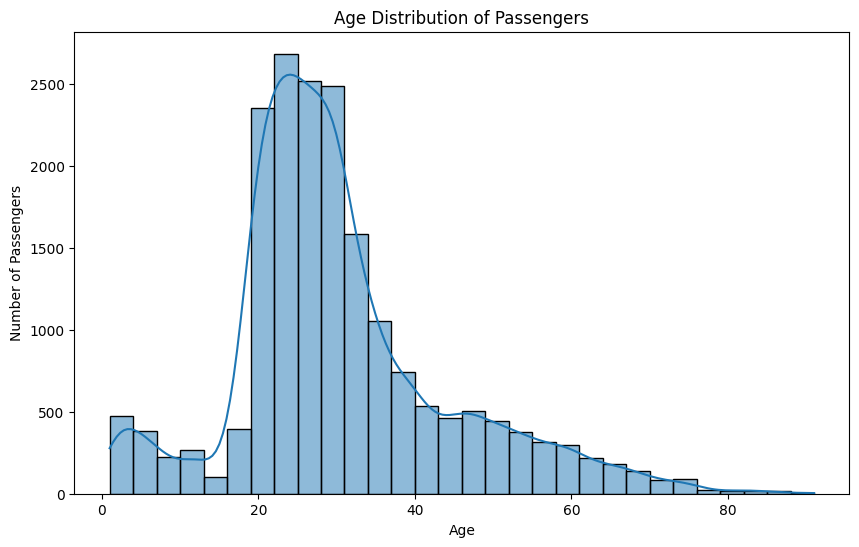

In [17]:
# Step 1: Explore age distribution
print("Summary statistics for age:")
print(df['passenger_age'].describe())
print("\nMissing ages:", df['passenger_age'].isna().sum())

# Check for invalid ages (e.g., negative or unrealistically high)
invalid_ages = df[(df['passenger_age'] < 0) | (df['passenger_age'] > 120)]['passenger_age']
print("Invalid ages (negative or >120):", len(invalid_ages))
if len(invalid_ages) > 0:
    print("Invalid age values:", invalid_ages.tolist())

# Plot histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['passenger_age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

In [18]:
# Step 2: Define age groups
age_bins = [0, 12, 17, 34, 59, float('inf')]  # Age boundaries
age_labels = ['Children (0-12)', 'Teenagers (13-17)', 'Young Adults (18-34)', 'Adults (35-59)', 'Seniors (60+)']
df['age_group'] = pd.cut(df['passenger_age'], bins=age_bins, labels=age_labels, include_lowest=True)


Number of passengers per age group:
Children (0-12): 1341
Teenagers (13-17): 311
Young Adults (18-34): 12202
Adults (35-59): 4235
Seniors (60+): 885
Unknown: 0

Total passengers: 18974
Total rows in dataset: 18974


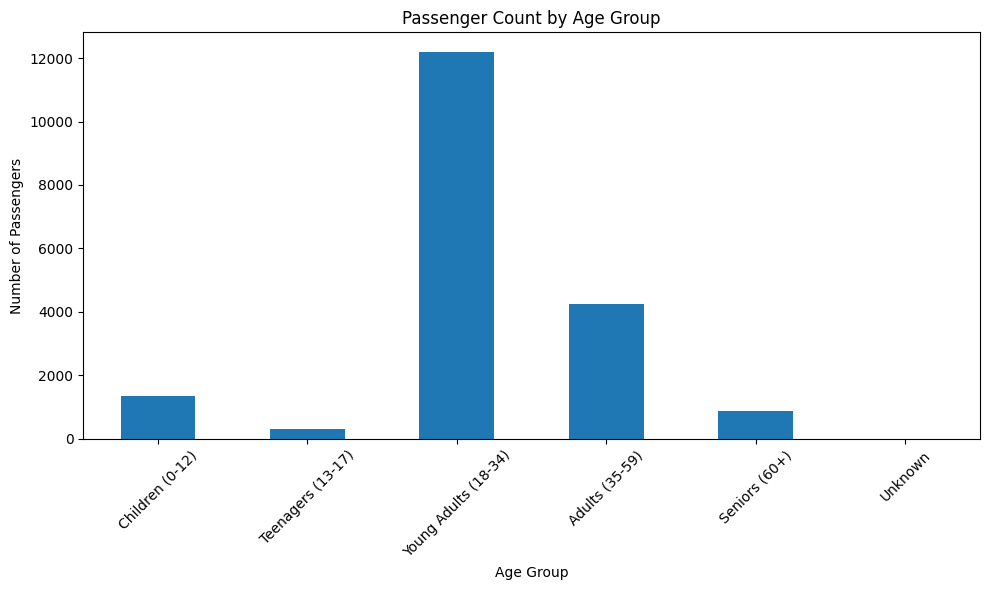

In [19]:
# Step 3: Count passengers per age group
age_group_counts = df['age_group'].value_counts().reindex(age_labels + ['Unknown'], fill_value=0)

# Print results
print("\nNumber of passengers per age group:")
for group, count in age_group_counts.items():
    print(f"{group}: {count}")

# Verify total passengers
total_passengers = age_group_counts.sum()
print(f"\nTotal passengers: {total_passengers}")
print(f"Total rows in dataset: {len(df)}")

# Step 4: Visualize age group counts
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar')
plt.title('Passenger Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
df.head()

,order_id,ticket_id,passenger_id,passenger_gender,passenger_age,ticket_source_name,ticket_status,created_date,departure_date,departure_time,...,from_to_location,from_to,airline,seat_class,ticket_price,baggage,insurance_fee,discount_amount,seat_category,age_group
0,20205,31268,Xs1fLinPQun+Oy/mD0FlfXMyJD38YlXJfXNbz+qO+5U=,Female,40,IOS,Paid,2023-03-01,2023-03-14,17:55:00,...,BMV - SGN,Đắk Lắk - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,I1_ECO,867760,0,0,45000,Economy,Adults (35-59)
1,20190,31242,m/auVlEoaGSe2MqR/Lq4CFXJnI8zauNyF/KiFmMgXHs=,Female,40,GYL,Paid,2023-03-01,2023-03-02,09:30:00,...,BMV - SGN,Đắk Lắk - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,Z1_ECO,974280,0,0,45000,Economy,Adults (35-59)
2,20245,31337,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,48,IOS,Paid,2023-03-01,2023-04-10,13:10:00,...,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1423080,0,0,16000,Economy,Adults (35-59)
3,20259,31360,WiK2P31WEd4mckRNVWz0C2aKKRgSrauAG8NdfTLnKjE=,Male,29,Android,New,2023-03-01,2023-04-10,13:10:00,...,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1067310,0,0,45000,Economy,Young Adults (18-34)
4,20255,31355,6HvtV2vTqUfNBJ53C4TzvJnb0s74KgcRNuUVS+8jRvU=,Female,42,IOS,Paid,2023-03-01,2023-04-10,13:10:00,...,HUI - SGN,Thừa Thiên Huế - Hồ Chí Minh,Ry/OjEDP12vfMWbnat5Mudc3PE4qIK/wwfCkBE5zGlM=,J1_ECO,1067310,0,0,24000,Economy,Adults (35-59)


## 3.3 Other col

In [21]:
# Step 1: Lead Time (Booking Window)
# Convert date columns to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['departure_date'] = pd.to_datetime(df['departure_date'], errors='coerce')

# Calculate lead time in days
df['lead_time_days'] = (df['departure_date'] - df['created_date']).dt.days

# Check for negative lead times
negative_lead_times = df[df['lead_time_days'] < 0]
print("Negative lead times:", len(negative_lead_times))
if len(negative_lead_times) > 0:
    print("Examples of negative lead times:")
    print(negative_lead_times[['created_date', 'departure_date', 'lead_time_days']].head())


Negative lead times: 0


In [22]:
# # Step 2: Day of Week
# # Extract day of week (0 = Monday, 6 = Sunday)
# df['departure_dayofweek'] = df['departure_date'].dt.dayofweek
# df['booking_dayofweek'] = df['created_date'].dt.dayofweek

# # Create is_weekend column (1 if Saturday or Sunday, else 0)
# df['is_weekend'] = df['departure_dayofweek'].isin([5, 6]).astype(int)


In [23]:
# Step 3: Split from_to column
# Split into 'from' and 'to' columns
from_to_split = df['from_to'].str.split('-', expand=True)
if from_to_split.shape[1] >= 2:
    df['from'] = from_to_split[0]
    df['to'] = from_to_split[1]
else:
    print("Warning: Some from_to values may not have a '-' delimiter")
    df['from'] = df['from_to']
    df['to'] = None

# IV. Data Mart

In [24]:
output_file = r'E:\SkyRevenue Insights\0. Data\df_cleaned.xlsx'
try:
    df.to_excel(output_file, index=False)
    print(f"\nDataset successfully saved as '{output_file}'")
    # Verify file exists
    if os.path.exists(output_file):
        print(f"File '{output_file}' confirmed in directory: {os.getcwd()}")
    else:
        print(f"Warning: File '{output_file}' was not found after saving")
except Exception as e:
    print(f"Error saving file: {e}")

Error saving file: [Errno 13] Permission denied: 'E:\\SkyRevenue Insights\\0. Data\\df_cleaned.xlsx'


In [25]:
# Load original data
df = pd.read_excel(r'E:\SkyRevenue Insights\0. Data\df_cleaned.xlsx')

In [33]:

from datetime import timedelta

# Đường dẫn thư mục lưu file CSV
output_dir = r"E:\SkyRevenue Insights\0. Data\Data mart"

# Load dữ liệu gốc
df['created_date'] = pd.to_datetime(df['created_date'])
df['departure_date'] = pd.to_datetime(df['departure_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# --- Dim_Date: cover full range của created_date, departure_date, arrival_date ---
min_date = min(df['created_date'].min(), df['departure_date'].min(), df['arrival_date'].min())
max_date = max(df['created_date'].max(), df['departure_date'].max(), df['arrival_date'].max())
all_dates = pd.date_range(start=min_date, end=max_date, freq='D')
dim_date = pd.DataFrame({'Date': all_dates})
dim_date['Year'] = dim_date['Date'].dt.year
dim_date['Quarter'] = dim_date['Date'].dt.quarter
dim_date['Month'] = dim_date['Date'].dt.month
dim_date['Day'] = dim_date['Date'].dt.day
dim_date['DayOfWeek'] = dim_date['Date'].dt.day_name()
dim_date['DateKey'] = dim_date.index + 1
dim_date.to_csv(f"{output_dir}\\Dim_Date.csv", index=False)

# --- Dim_Customer & RFM + classification ---
snapshot_date = df['created_date'].max() + timedelta(days=1)
rfm = df.groupby('passenger_id').agg({
    'created_date': lambda x: (snapshot_date - x.max()).days,
    'ticket_id': 'count',
    'ticket_price': 'sum'
}).reset_index().rename(columns={
    'created_date': 'Recency',
    'ticket_id': 'Frequency',
    'ticket_price': 'Monetary'
})
# Tính R, F, M quartiles
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=False, duplicates='drop') + 1
rfm['F'] = pd.qcut(rfm['Frequency'], 4, labels=False, duplicates='drop') + 1
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=False, duplicates='drop') + 1
rfm['RFM_Segment'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)
# Tính tổng điểm và phân loại
rfm['RFM_Score'] = rfm['R'] + rfm['F'] + rfm['M']
def classify(score):
    if score >= 10:
        return 'Champions'
    elif score >= 7:
        return 'Loyal'
    elif score >= 5:
        return 'Potential'
    else:
        return 'At Risk'
rfm['RFM_Class'] = rfm['RFM_Score'].apply(classify)

dim_customer = df[['passenger_id','passenger_gender','passenger_age','age_group']].drop_duplicates()
dim_customer = dim_customer.merge(rfm, on='passenger_id')
dim_customer['PassengerKey'] = range(1, len(dim_customer)+1)
dim_customer.to_csv(f"{output_dir}\\Dim_Customer.csv", index=False)

# --- Dim_Channel ---
dim_channel = pd.DataFrame({
    'ChannelKey': range(1, df['ticket_source_name'].nunique()+1),
    'ChannelName': df['ticket_source_name'].unique()
})
dim_channel.to_csv(f"{output_dir}\\Dim_Channel.csv", index=False)

# --- Dim_Airline ---
dim_airline = pd.DataFrame({
    'AirlineKey': range(1, df['airline'].nunique()+1),
    'AirlineName': df['airline'].unique()
})
dim_airline.to_csv(f"{output_dir}\\Dim_Airline.csv", index=False)

# --- Dim_Origin ---
dim_origin = pd.DataFrame({
    'OriginKey': range(1, df['from'].str.strip().nunique()+1),
    'OriginName': df['from'].str.strip().unique()
})
dim_origin.to_csv(f"{output_dir}\\Dim_Origin.csv", index=False)

# --- Dim_Destination ---
dim_destination = pd.DataFrame({
    'DestinationKey': range(1, df['to'].str.strip().nunique()+1),
    'DestinationName': df['to'].str.strip().unique()
})
dim_destination.to_csv(f"{output_dir}\\Dim_Destination.csv", index=False)

# --- Dim_Route ---
routes = df[['from','to']].drop_duplicates().reset_index(drop=True)
routes['OriginName'] = routes['from'].str.strip()
routes['DestinationName'] = routes['to'].str.strip()
routes['RouteName'] = routes['OriginName'] + ' → ' + routes['DestinationName']
routes['RouteKey'] = routes.index + 1
origin_map = dict(zip(dim_origin['OriginName'], dim_origin['OriginKey']))
dest_map = dict(zip(dim_destination['DestinationName'], dim_destination['DestinationKey']))
routes['OriginKey'] = routes['OriginName'].map(origin_map)
routes['DestinationKey'] = routes['DestinationName'].map(dest_map)
dim_route = routes[['RouteKey','OriginKey','DestinationKey','RouteName']]
dim_route.to_csv(f"{output_dir}\\Dim_Route.csv", index=False)

# --- Dim_SeatClass ---
dim_seatclass = df[['seat_class','seat_category']].drop_duplicates().reset_index(drop=True)
dim_seatclass = dim_seatclass.rename(columns={'seat_class':'SeatClassName','seat_category':'SeatGroup'})
dim_seatclass['SeatClassKey'] = dim_seatclass.index + 1
dim_seatclass.to_csv(f"{output_dir}\\Dim_SeatClass.csv", index=False)

# --- Fact_Booking ---
# Map keys
date_map = dict(zip(dim_date['Date'], dim_date['DateKey']))
cust_map = dict(zip(dim_customer['passenger_id'], dim_customer['PassengerKey']))
channel_map = dict(zip(dim_channel['ChannelName'], dim_channel['ChannelKey']))
airline_map = dict(zip(dim_airline['AirlineName'], dim_airline['AirlineKey']))
origin_map = dict(zip(dim_origin['OriginName'], dim_origin['OriginKey']))
dest_map = dict(zip(dim_destination['DestinationName'], dim_destination['DestinationKey']))
route_map = dict(zip(dim_route['RouteName'], dim_route['RouteKey']))
seatclass_map = dict(zip(dim_seatclass['SeatClassName'], dim_seatclass['SeatClassKey']))

df['OrderDateKey'] = df['created_date'].map(date_map)
df['DepartureDateKey'] = df['departure_date'].map(date_map)
df['ArrivalDateKey'] = df['arrival_date'].map(date_map)
df['PassengerKey'] = df['passenger_id'].map(cust_map)
df['ChannelKey'] = df['ticket_source_name'].map(channel_map)
df['AirlineKey'] = df['airline'].map(airline_map)
df['OriginKey'] = df['from'].str.strip().map(origin_map)
df['DestinationKey'] = df['to'].str.strip().map(dest_map)
df['RouteKey'] = (df['from'].str.strip() + ' → ' + df['to'].str.strip()).map(route_map)
df['SeatClassKey'] = df['seat_class'].map(seatclass_map)

fact_cols = [
    'order_id','ticket_id','OrderDateKey','DepartureDateKey','ArrivalDateKey',
    'PassengerKey','ChannelKey','AirlineKey','OriginKey','DestinationKey',
    'RouteKey','SeatClassKey','ticket_price','discount_amount',
    'insurance_fee','baggage','lead_time_days'
]
fact_booking = df[fact_cols].drop_duplicates().reset_index(drop=True)
fact_booking['BookingKey'] = range(1, len(fact_booking)+1)
fact_booking['DiscountRate'] = fact_booking['discount_amount'] / fact_booking['ticket_price']
fact_booking['CancellationFlag'] = (df['ticket_status'] == 'Cancelled').astype(int).values
fact_booking['ProfitAmount'] = fact_booking['ticket_price'] - fact_booking['discount_amount'] - fact_booking['insurance_fee']
fact_booking.to_csv(f"{output_dir}\\Fact_Booking.csv", index=False)

